In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json

#### Configuración de tema matplotlib

In [2]:
plt.style.use('seaborn-v0_8-pastel')

#### Conexión a base de datos

In [3]:
with open('../config/lyft_conection.json', 'r') as file:
    credenciales_lyft = json.load(file)

In [4]:
engine = create_engine(f"mysql+pymysql://{credenciales_lyft['USERNAME']}:{credenciales_lyft['PASSWORD']}@{credenciales_lyft['SERVER']}/{credenciales_lyft['DATABASE']}")

#### Información de disponibilidad de bicicletas con 'BikeAvailabilityFact'

##### Filtro de fechas

In [5]:
start_date = '2025-09-01 00:00:00'
end_date = '2025-09-30 23:59:59'

In [6]:
sql_bike_availability = f'''

SELECT 
    *
FROM BikeAvailabilityFact
WHERE 
	timestamp BETWEEN UNIX_TIMESTAMP(CONVERT_TZ("{start_date}", "America/Mexico_City", 'UTC'))*1000
    AND UNIX_TIMESTAMP(CONVERT_TZ("{end_date}", "America/Mexico_City", 'UTC'))*1000;

'''

df_sql_bike_availability = pd.read_sql(sql_bike_availability, engine)
df_sql_bike_availability.head()

,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id
0,2235451,1756706400000,2025-09-07 11:38:50,1361,4970,1557,159,30,430,1756684800000,10000
1,2235452,1756706700000,2025-09-07 11:38:50,1361,4969,1557,152,30,438,1756684800000,10005
2,2235453,1756707000000,2025-09-07 11:38:50,1360,4939,1559,155,30,464,1756684800000,10010
3,2235454,1756707300000,2025-09-07 11:38:50,1360,4929,1558,152,30,478,1756684800000,10015
4,2235455,1756707600000,2025-09-07 11:38:50,1360,4909,1556,142,30,510,1756684800000,10020


In [7]:
# convertir timestamp a datetime
df_sql_bike_availability['datetime'] = pd.to_datetime(df_sql_bike_availability['timestamp'], unit='ms', utc=True).dt.tz_convert('America/Mexico_City')
df_sql_bike_availability.head()

,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id,datetime
0,2235451,1756706400000,2025-09-07 11:38:50,1361,4970,1557,159,30,430,1756684800000,10000,2025-09-01 00:00:00-06:00
1,2235452,1756706700000,2025-09-07 11:38:50,1361,4969,1557,152,30,438,1756684800000,10005,2025-09-01 00:05:00-06:00
2,2235453,1756707000000,2025-09-07 11:38:50,1360,4939,1559,155,30,464,1756684800000,10010,2025-09-01 00:10:00-06:00
3,2235454,1756707300000,2025-09-07 11:38:50,1360,4929,1558,152,30,478,1756684800000,10015,2025-09-01 00:15:00-06:00
4,2235455,1756707600000,2025-09-07 11:38:50,1360,4909,1556,142,30,510,1756684800000,10020,2025-09-01 00:20:00-06:00


In [8]:
# extraer la hora de la columna datetime
df_sql_bike_availability['recordHour'] = df_sql_bike_availability['datetime'].dt.hour
df_sql_bike_availability['recordDay'] = df_sql_bike_availability['datetime'].dt.day
df_sql_bike_availability['recordMonth'] = df_sql_bike_availability['datetime'].dt.month

# extraer hora con minutos y segundos
df_sql_bike_availability['recordTime'] = df_sql_bike_availability['datetime'].dt.time

df_sql_bike_availability.head(3)

,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime
0,2235451,1756706400000,2025-09-07 11:38:50,1361,4970,1557,159,30,430,1756684800000,10000,2025-09-01 00:00:00-06:00,0,1,9,00:00:00
1,2235452,1756706700000,2025-09-07 11:38:50,1361,4969,1557,152,30,438,1756684800000,10005,2025-09-01 00:05:00-06:00,0,1,9,00:05:00
2,2235453,1756707000000,2025-09-07 11:38:50,1360,4939,1559,155,30,464,1756684800000,10010,2025-09-01 00:10:00-06:00,0,1,9,00:10:00


In [9]:
#filtrar datos donde recordTime sea 05:00:00
df_bike_availability_5am = df_sql_bike_availability[df_sql_bike_availability['recordTime'] == pd.to_datetime('05:00:00').time()]
df_bike_availability_5am.head()

,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime
60,2235511,1756724400000,2025-09-07 11:38:50,1356,5034,1889,47,30,400,1756684800000,10300,2025-09-01 05:00:00-06:00,5,1,9,05:00:00
348,2237527,1756810800000,2025-09-08 11:40:48,1312,5002,1904,47,35,470,1756771200000,10300,2025-09-02 05:00:00-06:00,5,2,9,05:00:00
636,2239543,1756897200000,2025-09-09 11:42:17,678,6139,372,55,40,459,1756857600000,10300,2025-09-03 05:00:00-06:00,5,3,9,05:00:00
924,2241559,1756983600000,2025-09-10 11:46:00,730,6117,525,51,38,425,1756944000000,10300,2025-09-04 05:00:00-06:00,5,4,9,05:00:00
1212,2243575,1757070000000,2025-09-11 11:44:57,924,5481,1434,52,38,422,1757030400000,10300,2025-09-05 05:00:00-06:00,5,5,9,05:00:00


In [10]:
# crear una nueva columnas con la suma de nbDamagedBike	nbInDockAvailable	nbInDockBlocked	nbInRental	nbMissingBike	nbWithTech
df_bike_availability_5am['totalBikes'] = df_bike_availability_5am[['nbDamagedBike', 'nbInDockAvailable', 'nbInDockBlocked', 'nbInRental', 'nbMissingBike', 'nbWithTech']].sum(axis=1)
df_bike_availability_5am.head()

C:\Users\victor.briones\AppData\Local\Temp\ipykernel_6568\2188947913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_availability_5am['totalBikes'] = df_bike_availability_5am[['nbDamagedBike', 'nbInDockAvailable', 'nbInDockBlocked', 'nbInRental', 'nbMissingBike', 'nbWithTech']].sum(axis=1)


,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime,totalBikes
60,2235511,1756724400000,2025-09-07 11:38:50,1356,5034,1889,47,30,400,1756684800000,10300,2025-09-01 05:00:00-06:00,5,1,9,05:00:00,8756
348,2237527,1756810800000,2025-09-08 11:40:48,1312,5002,1904,47,35,470,1756771200000,10300,2025-09-02 05:00:00-06:00,5,2,9,05:00:00,8770
636,2239543,1756897200000,2025-09-09 11:42:17,678,6139,372,55,40,459,1756857600000,10300,2025-09-03 05:00:00-06:00,5,3,9,05:00:00,7743
924,2241559,1756983600000,2025-09-10 11:46:00,730,6117,525,51,38,425,1756944000000,10300,2025-09-04 05:00:00-06:00,5,4,9,05:00:00,7886
1212,2243575,1757070000000,2025-09-11 11:44:57,924,5481,1434,52,38,422,1757030400000,10300,2025-09-05 05:00:00-06:00,5,5,9,05:00:00,8351


In [16]:
# filtrar datos donde nbInDockAvailable es igual a 6402
df_filtered = df_sql_bike_availability[ df_sql_bike_availability['nbInRental'] == 170 ]
df_filtered


,id,timestamp,recordTimestamp,nbDamagedBike,nbInDockAvailable,nbInDockBlocked,nbInRental,nbMissingBike,nbWithTech,date_id,time_id,datetime,recordHour,recordDay,recordMonth,recordTime
1813,2247344,1757250300000,2025-09-14 11:26:53,1304,5151,1628,170,32,367,1757203200000,10425,2025-09-07 07:05:00-06:00,7,7,9,07:05:00
3833,2261460,1757856300000,2025-09-21 11:08:21,948,5505,1052,170,4,328,1757808000000,10445,2025-09-14 07:25:00-06:00,7,14,9,07:25:00
4308,2263663,1757998800000,2025-09-22 11:20:55,1079,5449,826,170,7,117,1757894400000,11380,2025-09-15 23:00:00-06:00,23,15,9,23:00:00
4309,2263664,1757999100000,2025-09-22 11:20:55,1080,5451,824,170,7,117,1757894400000,11385,2025-09-15 23:05:00-06:00,23,15,9,23:05:00
6042,2275765,1758519000000,2025-09-28 11:31:47,939,5274,700,170,17,583,1758412800000,11410,2025-09-21 23:30:00-06:00,23,21,9,23:30:00
7269,2285632,1758887100000,2025-10-03 11:25:33,797,5328,1013,170,24,734,1758844800000,10345,2025-09-26 05:45:00-06:00,5,26,9,05:45:00


In [11]:
# agrupar por día y obtener la media de nbBikesAvailable
df_sql_bike_availability_night_grouped = df_sql_bike_availability.groupby('recordDay').agg({
    'nbInDockAvailable':'mean',
}).reset_index()
df_sql_bike_availability_night_grouped

,recordDay,nbInDockAvailable
0,1,4438.215278
1,2,4835.385417
2,3,5305.222222
3,4,5168.701389
4,5,4810.864583
5,6,4947.399306
6,7,4686.888889
7,8,4456.291667
8,9,4851.555556
9,10,4992.298611


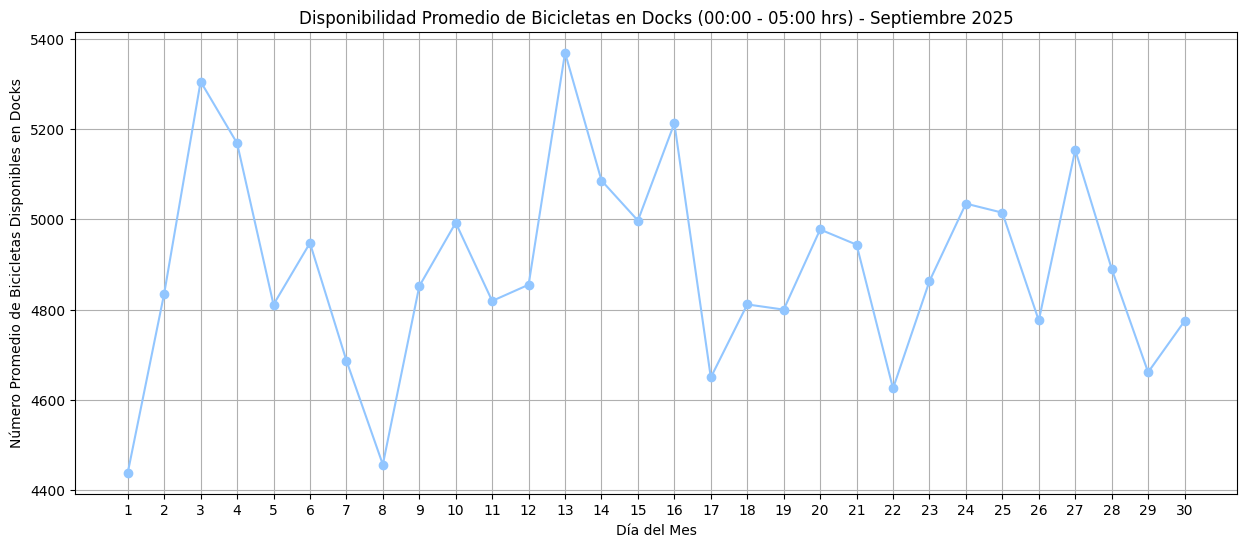

In [12]:
# Graficar la disponibilidad promedio de bicicletas en los docks entre las 00:00 y las 05:00 horas para cada día del mes
plt.figure(figsize=(15,6))
plt.plot(df_sql_bike_availability_night_grouped['recordDay'], df_sql_bike_availability_night_grouped['nbInDockAvailable'], marker='o')
plt.title('Disponibilidad Promedio de Bicicletas en Docks (00:00 - 05:00 hrs) - Septiembre 2025')
plt.xlabel('Día del Mes')
plt.ylabel('Número Promedio de Bicicletas Disponibles en Docks')
plt.xticks(df_sql_bike_availability_night_grouped['recordDay'])
plt.grid()
plt.show()